In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [132]:
file_path = "../Datasets/조업편차분석.csv"
data = pd.read_csv(file_path)

In [133]:
x = data.drop(columns=["No.", "A1"]).to_numpy()
y = data["A1"].to_numpy().reshape(-1, 1)

In [134]:
def minmax(train, test):
    train_min = np.min(train, axis=0)
    train_max = np.max(train, axis=0)

    scaled_train = (train - train_min) / (train_max - train_min)
    scaled_test = (test - train_min) / (train_max - train_min)

    return scaled_train, scaled_test

def standarize(train, test):
    mean = np.mean(train)
    std = np.std(train)

    scaled_train = (train - mean) / std
    scaled_test = (test- mean) / std

    return scaled_train, scaled_test

In [135]:
train_ratio = 0.8
train_size = int(x.shape[0] * train_ratio)

x_train, x_test = minmax(x[:train_size], x[train_size:])
y_train, y_test = minmax(y[:train_size], y[train_size:])

# x_train_stand, x_test_stand = standarize(x[:train_size], x[train_size:])
# y_train_stand, y_test_stand = standarize(y[:train_size], y[train_size:])

In [136]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(6076, 53) (1520, 53)
(6076, 1) (1520, 1)


In [137]:
def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    return 1 - tanh(z) ** 2

def relu(z):
    pass

def relu_derivative(z):
    pass

In [138]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / len(y_true)

In [139]:
input_dim = x_train.shape[1]
hidden_dim = 64
output_dim = y_train.shape[1]

np.random.seed(42)

sqrt_h = np.sqrt(6 / (input_dim + hidden_dim))
sqrt_y = np.sqrt(6 / (hidden_dim + output_dim))

w_ih = np.random.uniform(low=-sqrt_h, high=sqrt_h, size=(input_dim, hidden_dim))
w_ho = np.random.uniform(low=-sqrt_h, high=sqrt_h, size=(hidden_dim, output_dim))

b_ih = np.zeros((1, hidden_dim))
b_ho = np.zeros((1, output_dim))

In [140]:
def forward_prop(x, w_ih, w_ho, b_ih, b_ho):
    z_ih = np.dot(x, w_ih) + b_ih
    a_ih = tanh(z_ih)

    z_ho = np.dot(a_ih, w_ho) + b_ho
    a_ho = tanh(z_ho)

    return z_ih, z_ho, a_ih, a_ho

In [141]:
def backward_prop(x, y_true, z_ih, a_ih, a_ho, w_ih, w_ho, b_ih, b_ho, learning_rate):
    dz_ho = a_ho - y_true
    dw_ho = np.dot(a_ih.T, dz_ho)
    db_ho = np.sum(dz_ho, axis=0, keepdims=True)

    da_ih = np.dot(dz_ho, w_ho.T)
    dz_ih = da_ih * tanh_derivative(z_ih)
    dw_ih = np.dot(x.T, dz_ih)
    db_ih = np.sum(dz_ih, axis=0, keepdims=True)

    w_ih -= learning_rate * dw_ih
    w_ho -= learning_rate * dw_ho
    b_ih -= learning_rate * db_ih
    b_ho -= learning_rate * db_ho

    return w_ih, w_ho, b_ih, b_ho

In [142]:
z_ih, z_ho, a_ih, a_ho = forward_prop(x_train, w_ih, w_ho, b_ih, b_ho)

In [143]:
print(z_ih.shape, z_ho.shape, a_ih.shape, a_ho.shape)

(6076, 64) (6076, 1) (6076, 64) (6076, 1)


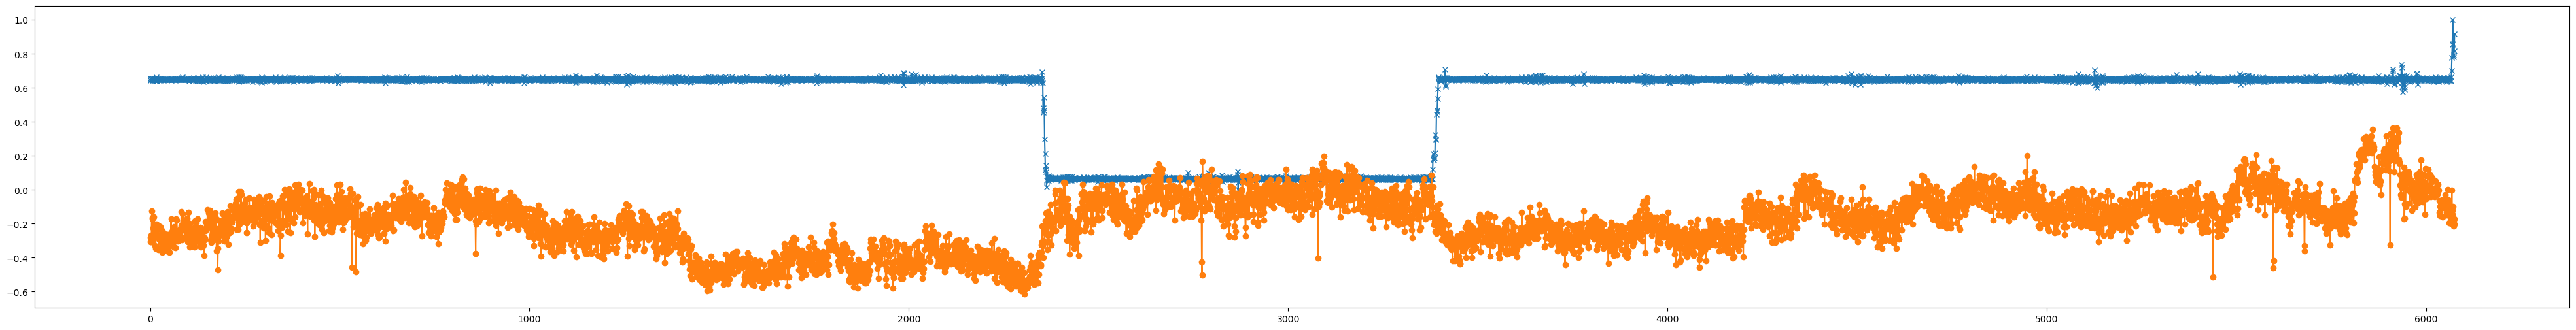

In [144]:
plt.figure(figsize=(50, 6))
plt.plot(y_train.flatten(), marker="x")
plt.plot(a_ho.reshape(-1, 1), marker="o")
plt.show()

In [145]:
w_ih, w_ho, b_ih, b_ho = backward_prop(x_train, y_train, z_ih, a_ih, a_ho, w_ih, w_ho, b_ih, b_ho, 0.01)

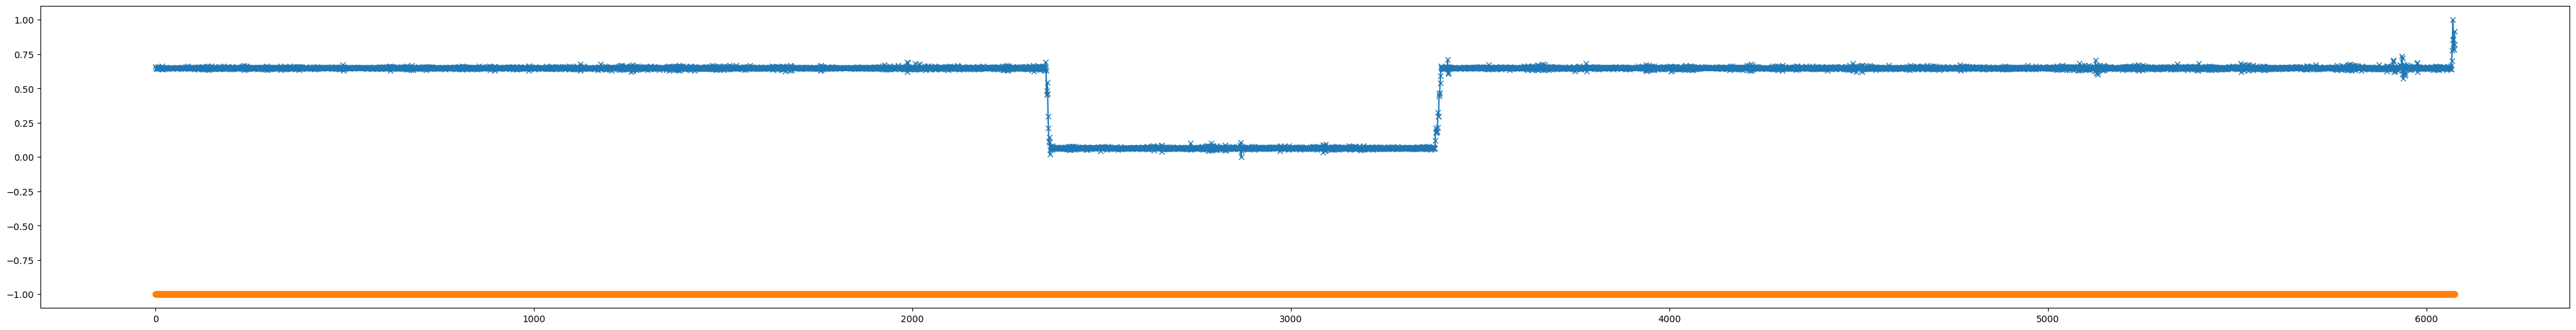

In [146]:
z_ih, z_ho, a_ih, a_ho = forward_prop(x_train, w_ih, w_ho, b_ih, b_ho)

plt.figure(figsize=(50, 6))
plt.plot(y_train.flatten(), marker="x")
plt.plot(a_ho.reshape(-1, 1), marker="o")
plt.show()